# Feature Engineering

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('/content/drive/MyDrive/PySpark_dataset/')

In [2]:
data = pd.read_excel('inputs/Clean Pune Real Estate Data.xlsx')
data.head()

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs clean
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


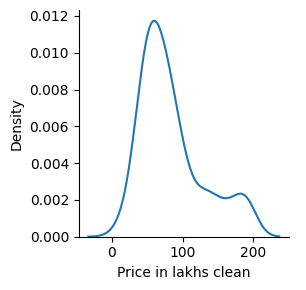

In [3]:
sns.FacetGrid(data).map(sns.kdeplot,"Price in lakhs clean").add_legend();
plt.show()

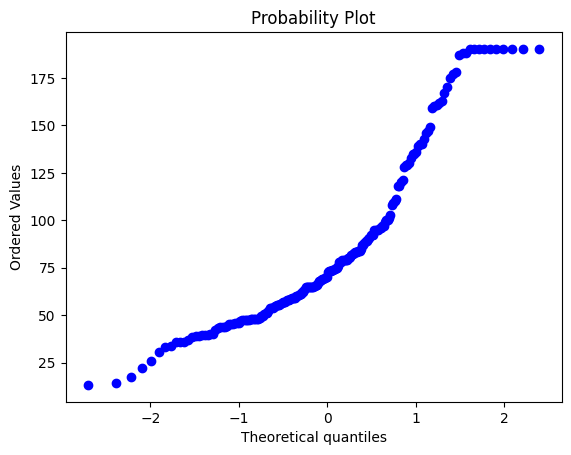

In [4]:
#Q-Q plot for checking if price is log-normal
import scipy
scipy.stats.probplot(data['Price in lakhs clean'].values, plot=plt)
plt.show()

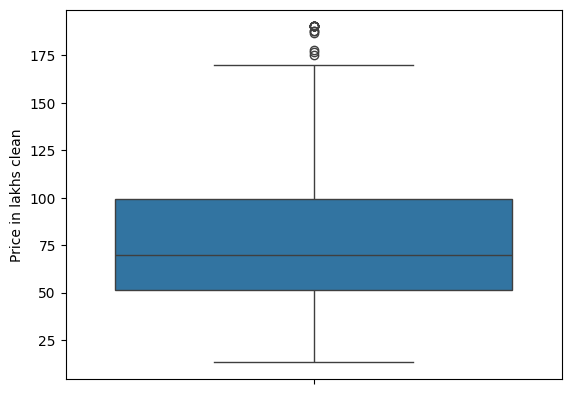

In [5]:
sns.boxplot(y="Price in lakhs clean", data = data)
plt.show()

In [6]:
import numpy as np
data['log Price in lakhs clean'] = np.log(data['Price in lakhs clean']+1)

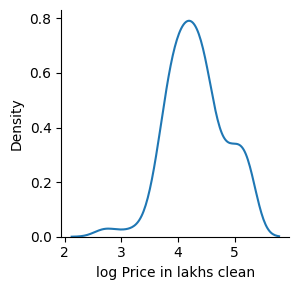

In [7]:
sns.FacetGrid(data).map(sns.kdeplot,"log Price in lakhs clean").add_legend();
plt.show()

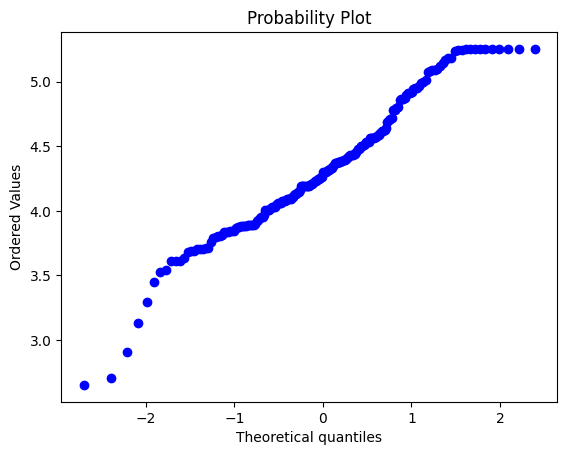

In [8]:
#Q-Q plot for checking if price is log-normal
import scipy
scipy.stats.probplot(data['log Price in lakhs clean'].values, plot=plt)
plt.show()

In [9]:
# Treating outliers in the numeric columns
cols_to_treat = ['Property Area in Sq. Ft. clean','Price in lakhs clean']

print("\nDistribution (raw):")
display(data[cols_to_treat].describe())

# Outlier treatment
def clip_outliers(df,col):
    q_l = df[col].min()
    q_h = df[col].quantile(0.95)
    df[col] = df[col].clip(lower = q_l, upper = q_h)
    return df

for col in cols_to_treat:
    df = clip_outliers(data,col)


print("\nDistribution (after outlier treatment):")
display(df[cols_to_treat].describe())


Distribution (raw):


,Property Area in Sq. Ft. clean,Price in lakhs clean
count,200.000000,199.000000
mean,878.655000,84.213065
std,334.181777,44.552319
min,113.000000,13.190000
25%,670.000000,51.500000
50%,800.500000,70.000000
75%,1041.250000,99.435001
max,1671.800000,190.300000



Distribution (after outlier treatment):


,Property Area in Sq. Ft. clean,Price in lakhs clean
count,200.000000,199.000000
mean,878.617000,84.109045
std,334.091164,44.304998
min,113.000000,13.190000
25%,670.000000,51.500000
50%,800.500000,70.000000
75%,1041.250000,99.435001
max,1671.040000,188.230000


,Sub-Area clean,Price in lakhs clean
11,kayani nagar,188.230000
18,lonavala,173.615000
24,nibm,145.057500
17,koregoan,139.500000
10,karvanagar,135.800000
2,baner,132.447500
32,vimannagar,127.500000
0,akurdi,109.666667
16,koregaon park,108.500000
5,bt kawade rd,106.049000


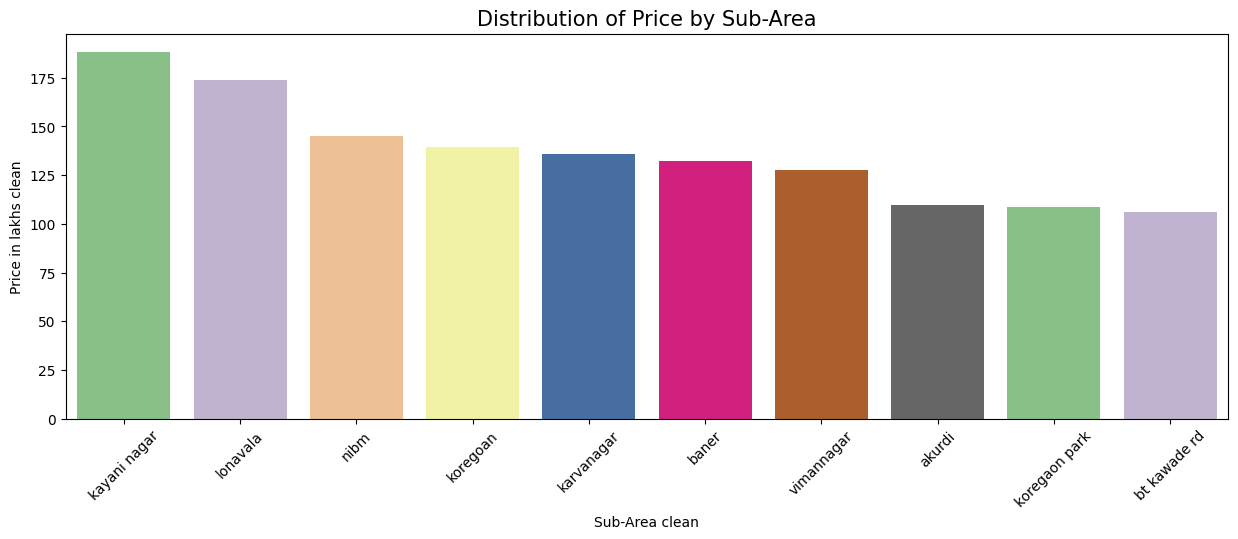

In [10]:
temp = (data.groupby('Sub-Area clean')['Price in lakhs clean'].mean()
            .reset_index().sort_values(by='Price in lakhs clean',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Sub-Area clean'],y=temp['Price in lakhs clean'], palette=("Accent"))
plt.title("Distribution of Price by Sub-Area",size=15)
plt.xticks(rotation=45)
plt.show()

In [11]:
# Saving the mapping dict for inference use
sub_area_price_map = data.groupby('Sub-Area clean')['Price in lakhs clean'].mean().to_dict()

"""import pickle
fileName = 'model/sub_area_price_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(sub_area_price_map,f)

sub_area_price_map"""

"import pickle\nfileName = 'model/sub_area_price_map.pkl'\nwith open(fileName,'wb') as f:\n    pickle.dump(sub_area_price_map,f)\n\nsub_area_price_map"

In [12]:
# creating the price by sub-area feature
data['Price by sub-area'] =  data.groupby('Sub-Area clean')['Price in lakhs clean'].transform('mean')
data.head(3)

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs clean,log Price in lakhs clean,Price by sub-area
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0,3.688879,58.044
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0,4.189655,58.044
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0,4.317488,58.044


<Axes: >

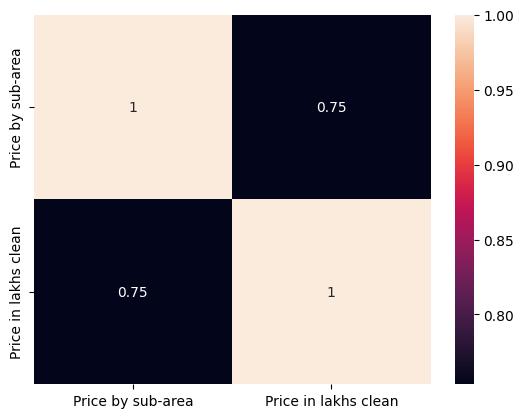

In [13]:
# checking the correlation of the feature
sns.heatmap(data[['Price by sub-area','Price in lakhs clean']].corr(), annot=True)

,Company Name clean,Price in lakhs clean
22,sagitarius ecospaces llp,188.230000
7,kalpataru,143.892000
26,supreme,141.057500
24,shroff developers,139.500000
10,kundan spaces,138.818571
12,maha anand pinnac associates,135.800000
29,urban space creator,132.800000
16,oxy buildcorp,127.500000
27,tejraaj group,115.000000
15,nirman developers,95.308334


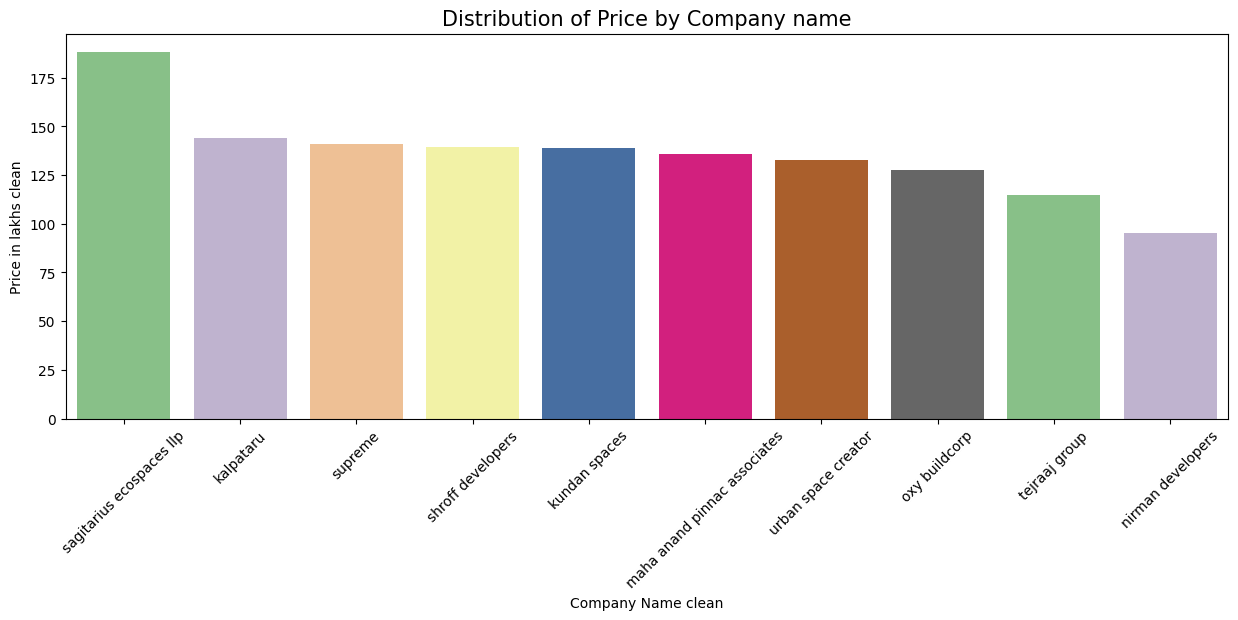

In [14]:
temp = (data.groupby('Company Name clean')['Price in lakhs clean'].mean()
            .reset_index().sort_values(by='Price in lakhs clean',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Company Name clean'],y=temp['Price in lakhs clean'], palette=("Accent"))
plt.title("Distribution of Price by Company name",size=15)
plt.xticks(rotation=45)
plt.show()

In [15]:
# Saving the mapping dict for inference use
company_price_map = data.groupby('Company Name clean')['Price in lakhs clean'].mean().to_dict()

import pickle
fileName = 'model/company_price_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(company_price_map,f)

company_price_map

{'ace constructions': 88.0,
 'anp corp': 87.5,
 'bhaktamar realities': 79.3633321126302,
 'calyx spaces': 15.24000024795532,
 'dolphin group': 51.666666666666664,
 'godrej properties': 84.5,
 'jhala group': 60.952000045776366,
 'kalpataru': 143.892,
 'keystone landmark': 81.75,
 'kohinoor group': 69.37799987792968,
 'kundan spaces': 138.81857142857143,
 'lush life': 43.643333752950035,
 'maha anand pinnac associates': 135.8,
 'majestique landmarks': 52.345001220703125,
 'mantra properties': 75.10714285714286,
 'nirman developers': 95.30833386739096,
 'oxy buildcorp': 127.5,
 'porwal  develkoper': 45.60000038146973,
 'porwal & anand develkoper': 55.239999771118164,
 'proviso group': 63.833333333333336,
 'puraniks': 90.86625009536743,
 'ravima ventures': 59.42857142857143,
 'sagitarius ecospaces llp': 188.23,
 'shapoorji paloonji': 89.73400039672852,
 'shroff developers': 139.5,
 'sukwani associates': 68.0,
 'supreme': 141.0575,
 'tejraaj group': 115.0,
 'unique properties': 59.728180972

In [16]:
# creating the price by company feature
data['Price by company'] =  data.groupby('Company Name clean')['Price in lakhs clean'].transform('mean')
data.head(3)

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs clean,log Price in lakhs clean,Price by sub-area,Price by company
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0,3.688879,58.044,89.734
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0,4.189655,58.044,89.734
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0,4.317488,58.044,89.734


<Axes: >

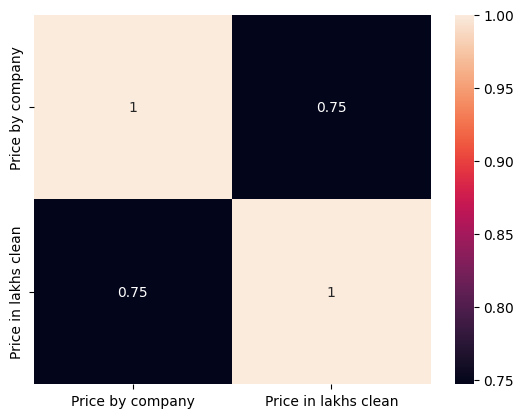

In [17]:
# checking the correlation of the feature
sns.heatmap(data[['Price by company','Price in lakhs clean']].corr(), annot=True)

,TownShip Name/ Society Name clean,Price in lakhs clean
8,bluegrass residences,188.230000
15,jade residences,183.820000
33,presidia,178.743333
34,puraniks sayama,173.615000
44,supreme estia,141.057500
5,aureta,139.500000
36,river dale residency,135.800000
49,urban skyline,132.800000
29,oxy beaumonde,127.500000
45,tej elevia,115.000000


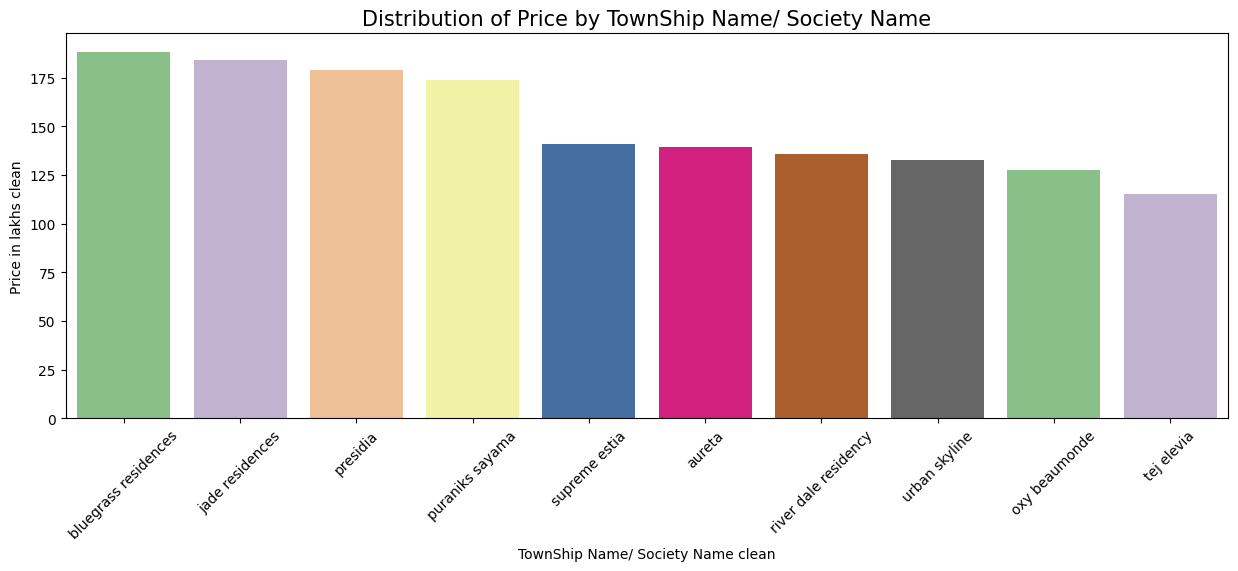

In [18]:
temp = (data.groupby('TownShip Name/ Society Name clean')['Price in lakhs clean'].mean()
            .reset_index().sort_values(by='Price in lakhs clean',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['TownShip Name/ Society Name clean'],y=temp['Price in lakhs clean'], palette=("Accent"))
plt.title("Distribution of Price by TownShip Name/ Society Name",size=15)
plt.xticks(rotation=45)
plt.show()

In [19]:
# Saving the mapping dict for inference use
township_society_price_map = data.groupby('TownShip Name/ Society Name clean')['Price in lakhs clean'].mean().to_dict()

import pickle
fileName = 'model/township_society_price_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(township_society_price_map, f)

township_society_price_map

{'7hills': 20.666666666666668,
 'abitante fiore': 63.28333346048991,
 'anp universe': 87.5,
 'anutham': 88.0,
 'atulya kanhe': 15.24000024795532,
 'aureta': 139.5,
 'bhaktamar residency': 79.3633321126302,
 'bliss solitaire': 45.30000114440918,
 'bluegrass residences': 188.23,
 'brookefield willows': 95.30833386739096,
 'dolphin garima': 51.666666666666664,
 'eternia 2.0': 108.875,
 'godrej hills retreat': 84.5,
 'impero': 43.643333752950035,
 'infinity': 108.5,
 'jade residences': 183.82000000000002,
 'k ville': 69.66499837239583,
 'kalpataru serenity': 84.0,
 'khush vista': 45.60000038146973,
 'kiarah terrazo': 89.2000020345052,
 'lesiure town': 63.833333333333336,
 'mahalunge riviera': 79.25,
 'mantra 29 gold': 69.76923076923077,
 'mantra insignia': 49.5,
 'mantra monarch': 80.0,
 'mantra sky tower': 109.66666666666667,
 'neco beaumont': 44.0,
 'newton homes': 60.333333333333336,
 'om mangalam chaitanya': 42.0,
 'oxy beaumonde': 127.5,
 'oxy eterno': 81.75,
 'parklane urbanjoy': 55.

In [20]:
# creating the price by sub-area feature
data['Price by township_society'] =  data.groupby('TownShip Name/ Society Name clean')['Price in lakhs clean'].transform('mean')
data.head(3)

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,...,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs clean,log Price in lakhs clean,Price by sub-area,Price by company,Price by township_society
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,...,1,1,1,1,492.0,39.0,3.688879,58.044,89.734,66.75
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,...,1,1,1,1,774.0,65.0,4.189655,58.044,89.734,66.75
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,...,1,1,1,1,889.0,74.0,4.317488,58.044,89.734,66.75


<Axes: >

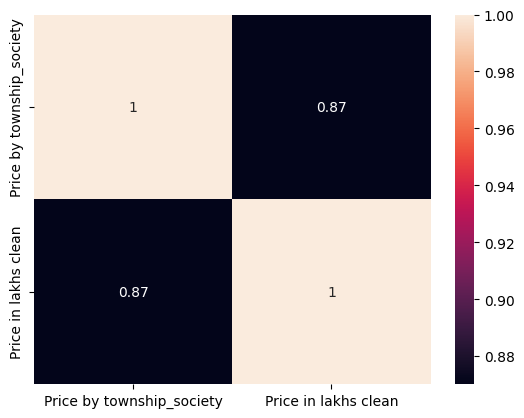

In [21]:
# checking the correlation of the feature
sns.heatmap(data[['Price by township_society','Price in lakhs clean']].corr(), annot=True)

In [22]:
amenities_col = ['Property Type clean', 'ClubHouse Clean', 'School / University in Township Clean', 'Hospital in TownShip Clean', 'Mall in TownShip Clean', 'Park / Jogging track Clean', 'Swimming Pool Clean']
print(amenities_col)

['Property Type clean', 'ClubHouse Clean', 'School / University in Township Clean', 'Hospital in TownShip Clean', 'Mall in TownShip Clean', 'Park / Jogging track Clean', 'Swimming Pool Clean']


In [23]:
temp = data[amenities_col]
temp['Amenities score'] = temp.sum(axis=1)
temp['Price'] = data['Price in lakhs clean']
temp.head(3)

,Property Type clean,ClubHouse Clean,School / University in Township Clean,Hospital in TownShip Clean,Mall in TownShip Clean,Park / Jogging track Clean,Swimming Pool Clean,Amenities score,Price
0,1.0,1,1,1,1,1,1,7.0,39.0
1,2.0,1,1,1,1,1,1,8.0,65.0
2,3.0,1,1,1,1,1,1,9.0,74.0


<Axes: >

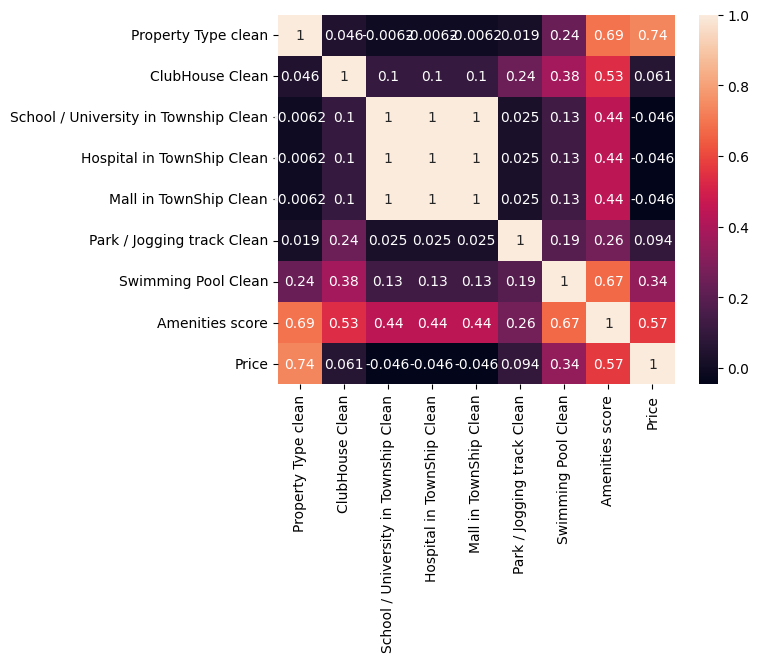

In [24]:
# checking the correlation of the feature
sns.heatmap(temp.corr(), annot=True)

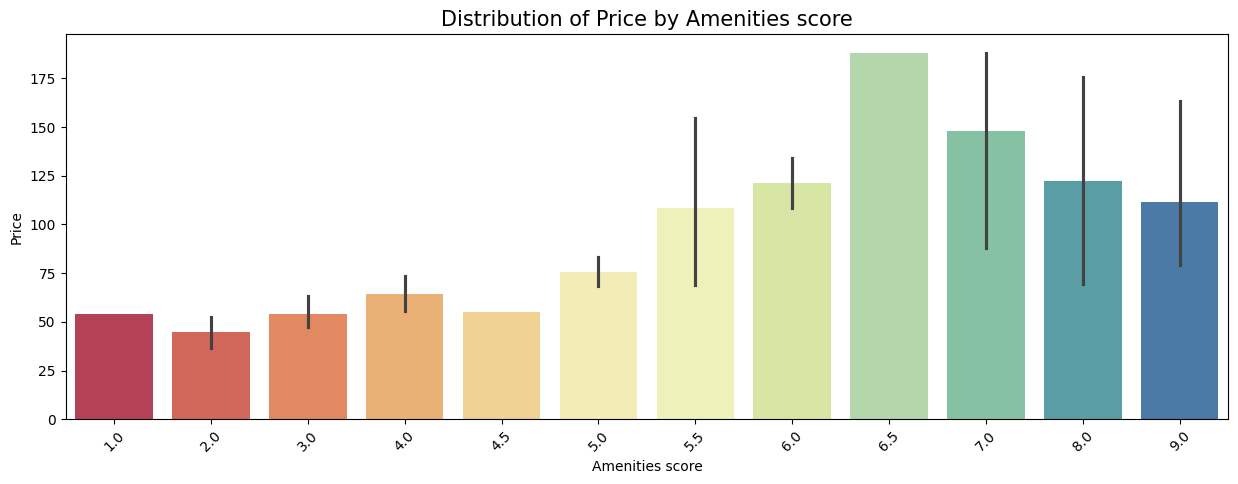

In [25]:
temp2 = (temp.groupby('Amenities score')['Price'].mean()
            .reset_index().sort_values(by='Price',ascending=False)[:10])

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Amenities score'],y=temp['Price'], palette=("Spectral"))
plt.title("Distribution of Price by Amenities score",size=15)
plt.xticks(rotation=45)
plt.show()

In [26]:
# Adding the amenitites score feature
data['Amenities score'] = temp['Amenities score']

In [27]:
# Saving the mapping dict for inference use
amenities_score_price_map = data.groupby('Amenities score')['Price in lakhs clean'].mean().to_dict()

import pickle
fileName = 'model/amenities_score_price_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(amenities_score_price_map,f)

amenities_score_price_map

{1.0: 54.0,
 2.0: 44.91599998474121,
 3.0: 54.24677473498929,
 4.0: 64.43418602610744,
 4.5: 55.22000122070312,
 5.0: 75.72947364940978,
 5.5: 108.22799920654298,
 6.0: 121.36200002288817,
 6.5: 188.23,
 7.0: 147.738,
 8.0: 122.5,
 9.0: 111.5}

In [28]:
data['Price by Amenities score'] =  data.groupby('Amenities score')['Price in lakhs clean'].transform('mean')
print(data.shape)
data.head(3)

(200, 23)


,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,...,Swimming Pool Clean,Gym Clean,Property Area in Sq. Ft. clean,Price in lakhs clean,log Price in lakhs clean,Price by sub-area,Price by company,Price by township_society,Amenities score,Price by Amenities score
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,...,1,1,492.0,39.0,3.688879,58.044,89.734,66.75,7.0,147.738
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,...,1,1,774.0,65.0,4.189655,58.044,89.734,66.75,8.0,122.500
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,...,1,1,889.0,74.0,4.317488,58.044,89.734,66.75,9.0,111.500


In [29]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [31]:
#nltk.download('stopwords')
#nltk.download('punkt')

In [32]:
print('Stopwords:- ',set(stopwords.words('english')))

Stopwords:-  {'if', 'same', 'under', "mightn't", 'very', 'that', 'have', "don't", 'm', 'its', 'up', 'hers', 'o', 'wouldn', "couldn't", 'while', 'themselves', 'needn', 'until', 'mustn', 'their', 'off', "you'll", 'itself', 'as', 'only', 're', 'and', 'i', 'you', 'once', 'those', 'is', 'then', 'of', 'yourself', 'were', 'such', "won't", 'your', 'himself', "needn't", 'them', 'her', "aren't", 'does', "weren't", 'not', "shan't", 'shan', 'any', "hadn't", 'yourselves', 'am', 'with', "wouldn't", 'more', "that'll", 'at', 'from', 'in', 'both', 'ma', 'ours', 'don', 'about', 'nor', 'we', 'll', 'or', 'the', 'being', "hasn't", 'are', 'yours', 'theirs', 'over', "you've", "it's", 'weren', 'who', 'has', 'during', 'each', 'they', 'been', "you're", 'doing', 'through', 'above', 'below', 'for', 'against', 'should', 'didn', 'by', 'when', 'some', 'on', 't', 'most', 'here', 'mightn', "doesn't", 'to', 'hasn', 'because', "you'd", 'y', 'again', 'all', 'wasn', "shouldn't", 'him', 'myself', 'whom', 'before', 'couldn'

In [33]:
# Preprocessing the text data

REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

#Custom Stoplist
stoplist = ["i","project","living","home",'apartment',"pune","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your",
            "yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it",
            "it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","that'll",
            "these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did",
            "doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about",
            "against","between","into","through","during","before","after","above","below","to","from","up","down","in","out",
            "on","off","over","under","again","further","then","once","here","there","when","where","why","all","any",
            "both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too",
            "very","s","t","can","will","just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain",
            "aren","couldn","didn","doesn","hadn","hasn",
            "haven","isn","ma","mightn","mustn","needn","shan","shan't",
            "shouldn","wasn","weren","won","rt","rt","qt","for",
            "the","with","in","of","and","its","it","this","i","have","has","would","could","you","a","an",
            "be","am","can","edushopper","will","to","on","is","by","ive","im","your","we","are","at","as","any","ebay","thank","hello","know",
            "need","want","look","hi","sorry","http", "https","body","dear","hello","hi","thanks","sir","tomorrow","sent","send","see","there","welcome","what","well","us"]

STOPWORDS_nlp.update(stoplist)

# Function to preprocess the text
def text_prepare(text):
    """
        text: a string

        return: modified initial string
    """
    text = text.replace("\d+"," ") # removing digits
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #removing mentions and urls
    text = text.lower() # lowercase text
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    text = text.strip()
    return text

# Cleaning the "text" column in the data frame using the above defined function
df_text = data["Description clean"].astype(str).apply(text_prepare)
df_text.head()

0    shapoorji paloonji comunity located suburbs ba...
1    vanaha township located near lonavala hill ran...
2    vanaha society suitable aged group people play...
3    vanaha township offering bhk grand prpoerties ...
4    area hub prestigious schools like bishop high ...
Name: Description clean, dtype: object

In [34]:
text = " ".join(sent for sent in df_text)
print("There are {} words in the text.".format(len(text)))

There are 33206 words in the text.


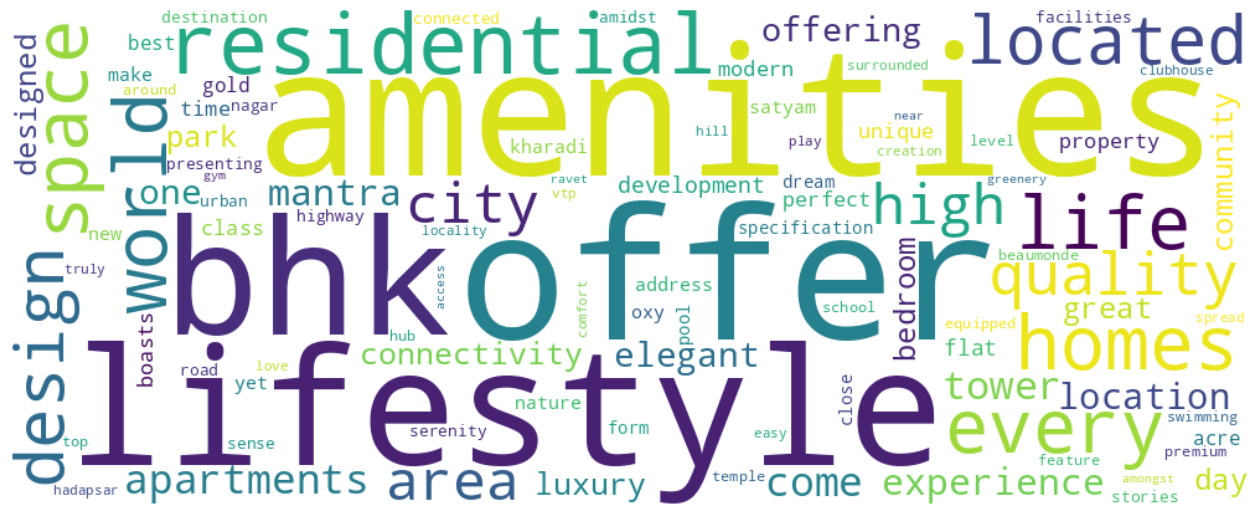

In [35]:
wordcloud = WordCloud(background_color = "white", height=400, width= 1000, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [36]:
# cleaning the description column
data["Description clean"] =  data["Description clean"].astype(str).apply(text_prepare)

In [40]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [37]:
from collections import Counter

def pos_counter(x,pos):
    """
    Returns the count for the given parts of speech tag

    NN - Noun
    VB - Verb
    JJ - Adjective
    RB - Adverb
    """
    tokens = nltk.word_tokenize(x.lower())
    tokens = [word for word in tokens if word not in STOPWORDS_nlp]
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags)
    return counts[pos]

data['Noun_Counts'] = data['Description clean'].apply(lambda x: pos_counter(x,'NN'))
data['Verb_Counts'] = data['Description clean'].apply(lambda x: (pos_counter(x,'VB')+pos_counter(x,'RB')))
data['Adjective_Counts'] = data['Description clean'].apply(lambda x: pos_counter(x,'JJ'))

In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [38]:
import nltk
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def generate_sentiment_scores(data):
    sid = SentimentIntensityAnalyzer()
    neg=[]
    pos=[]
    neu=[]
    comp=[]
    for sentence in tqdm(data['Description clean'].values):
        sentence_sentiment_score = sid.polarity_scores(sentence)
        comp.append(sentence_sentiment_score['compound'])
        neg.append(sentence_sentiment_score['neg'])
        pos.append(sentence_sentiment_score['pos'])
        neu.append(sentence_sentiment_score['neu'])
    return comp,neg,pos,neu

In [39]:
data['compound'],data['negative'],data['positive'],data['neutral']=generate_sentiment_scores(data)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 2838.08it/s]


In [40]:
cv = CountVectorizer(ngram_range=(2,2),max_features=10)
# cv = CountVectorizer()
cv_object = cv.fit(df['Description clean'])

In [41]:
import pickle
fileName = 'model/count_vectorizer.pkl'
with open(fileName,'wb') as f:
    pickle.dump(cv_object,f)

In [45]:
fileName = '/home/shobot/Desktop/Project/Real Estate Price Prediction/model/count_vectorizer.pkl'
with open(fileName, 'rb') as file:
    cv_object = pickle.load(file)

In [46]:
cv_object

CountVectorizer(max_features=10, ngram_range=(2, 2))

In [42]:
X = cv_object.transform(df['Description clean'])
print(X.shape)
X.toarray()

(200, 10)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
cv_object.get_feature_names_out()

array(['amenities like', 'boasts elegant', 'elegant towers',
       'great community', 'mantra gold', 'offering bedroom',
       'quality specification', 'stories offering', 'towers stories',
       'world class'], dtype=object)

In [44]:
df_ngram = pd.DataFrame(X.toarray(),columns=cv_object.get_feature_names_out())
print(df_ngram.shape)
df_ngram.head()

(200, 10)


,amenities like,boasts elegant,elegant towers,great community,mantra gold,offering bedroom,quality specification,stories offering,towers stories,world class
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=200000, ngram_range=(1, 3), stop_words='english')
tfidf_object = tfidf.fit(df['Description clean'])

In [52]:
X_tfidf = tfidf_object.transform(df['Description clean'])
print(X_tfidf.shape)
X_tfidf.toarray()

(200, 6400)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
df_tfidf_ngram = pd.DataFrame(X_tfidf.toarray(),columns=tfidf_object.get_feature_names_out())
print(df_tfidf_ngram.shape)
df_tfidf_ngram.head()

(200, 6400)


,abitante,abitante fiore,abitante fiore destination,abitante fiore located,abitante fiore new,abitante fiore offers,abitante fiore taken,abode,abode prefer,abode prefer away,...,years excellence,years excellence real,yor,yor reach,zero,zero level,zero level recreational,zones,zones terrace,zones terrace level
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
import pickle
fileName = 'model/tfidf_vectorizer.pkl'
with open(fileName,'wb') as f:
    pickle.dump(tfidf_object,f)

In [55]:
# Adding this to the main dataframe
df_final_cv = pd.concat([data.reset_index(drop=True),df_ngram.reset_index(drop=True)],axis=1)
df_final_cv.shape
df_final_cv.head()

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,...,amenities like,boasts elegant,elegant towers,great community,mantra gold,offering bedroom,quality specification,stories offering,towers stories,world class
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located suburbs ba...,1,1,...,0,0,0,0,0,0,0,0,0,0
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near lonavala hill ran...,1,1,...,0,0,0,0,0,0,0,0,0,0
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society suitable aged group people play...,1,1,...,0,0,0,0,0,0,0,0,0,0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township offering bhk grand prpoerties ...,1,1,...,0,0,0,0,0,0,0,0,0,0
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,area hub prestigious schools like bishop high ...,1,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_final_cv.to_csv('model/real_estate_model_cv.csv',index=False)

In [57]:
# Adding this to the main dataframe
df_final_tfidf = pd.concat([data.reset_index(drop=True),df_tfidf_ngram.reset_index(drop=True)],axis=1)
df_final_tfidf.shape
df_final_tfidf.head()

,City,State,Country,Property Type clean,Sub-Area clean,Company Name clean,TownShip Name/ Society Name clean,Description clean,ClubHouse Clean,School / University in Township Clean,...,years excellence,years excellence real,yor,yor reach,zero,zero level,zero level recreational,zones,zones terrace,zones terrace level
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located suburbs ba...,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near lonavala hill ran...,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society suitable aged group people play...,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township offering bhk grand prpoerties ...,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,area hub prestigious schools like bishop high ...,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df_final_tfidf.to_csv('model/real_estate_model_tfidf.csv',index=False)